tf.keras

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.3891 - loss: 5.5798 - val_accuracy: 0.5628 - val_loss: 1.2756
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.5252 - loss: 1.3726 - val_accuracy: 0.6028 - val_loss: 1.1722
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5640 - loss: 1.2405 - val_accuracy: 0.6209 - val_loss: 1.1259
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5878 - loss: 1.1704 - val_accuracy: 0.6262 - val_loss: 1.0965
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6082 - loss: 1.1301 - val_accuracy: 0.6329 - val_loss: 1.0788
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6221 - loss: 1.0812 - val_accuracy: 0.6386 - val_loss: 1.0571
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6272 - loss: 1.0643 - val_accuracy: 0.6466 - val_loss: 1.0496
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6348 - loss: 1.0390 - 

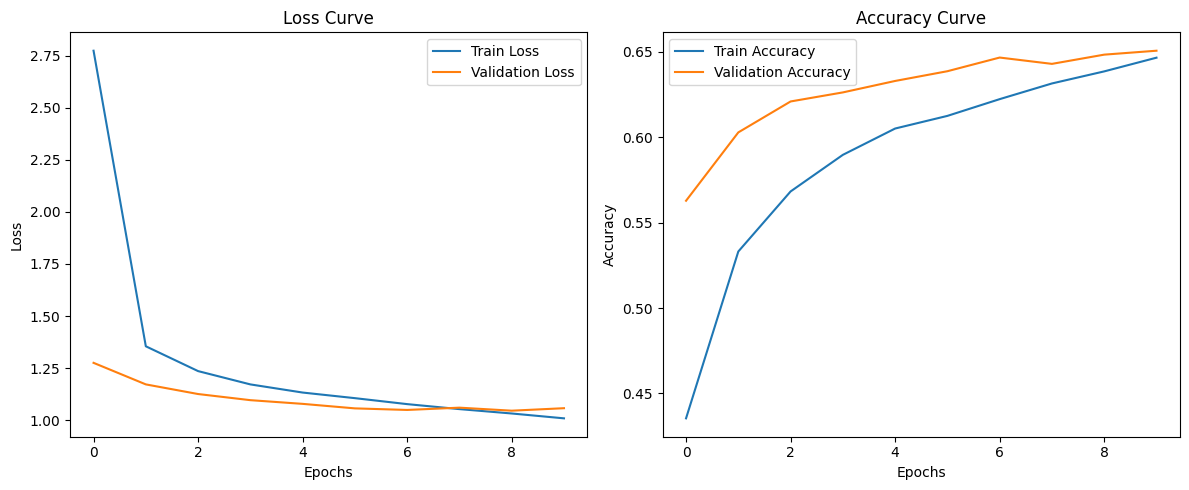

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


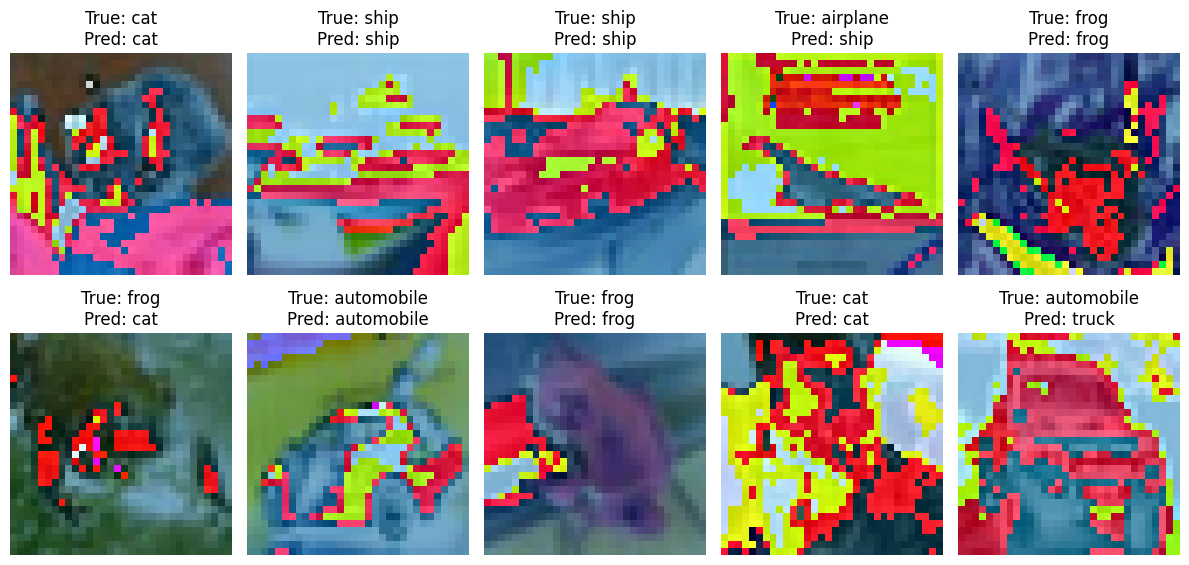

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 加載 CIFAR-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. 資料預處理
x_train = preprocess_input(x_train)  # VGG19 預處理
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 10)  # One-hot 編碼
y_test = to_categorical(y_test, 10)

# 3. 加載 VGG19 預訓練模型
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # 冻結預訓練模型的權重

# 4. 定義模型結構
model = Sequential([
    base_model,  # 使用 VGG19 的特徵提取部分
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 的 10 個分類
])

# 5. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. 訓練模型
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=64)

# 7. 評估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 8. 繪製訓練曲線
def plot_history(history):
    plt.figure(figsize=(12, 5))
    # 損失曲線
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 準確度曲線
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

# 9. 顯示圖片及真實標籤與預測標籤
def show_predictions(model, x_test, y_test, num_images=10, class_names=None):
    # 進行預測
    predictions = model.predict(x_test)
    predicted_labels = np.argmax(predictions, axis=1)  # 預測類別
    true_labels = np.argmax(y_test, axis=1)  # 真實類別

    # 如果沒有提供 class_names，使用默認的 CIFAR-10 類別名稱
    if class_names is None:
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck']

    # 繪製圖片
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow((x_test[i] * 255).astype('uint8'))  # 恢復到原始像素範圍
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test, num_images=10)


pytorch

100%|██████████| 170M/170M [00:04<00:00, 41.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 161MB/s]


Epoch [1/10], Loss: 1.4732, Accuracy: 53.50%
Epoch [2/10], Loss: 1.4805, Accuracy: 55.26%
Epoch [3/10], Loss: 1.4934, Accuracy: 55.56%
Epoch [4/10], Loss: 1.4968, Accuracy: 55.86%
Epoch [5/10], Loss: 1.5060, Accuracy: 55.62%
Epoch [6/10], Loss: 1.5116, Accuracy: 55.86%
Epoch [7/10], Loss: 1.5174, Accuracy: 55.69%
Epoch [8/10], Loss: 1.5023, Accuracy: 56.18%
Epoch [9/10], Loss: 1.5197, Accuracy: 55.93%
Epoch [10/10], Loss: 1.5247, Accuracy: 55.64%


Test Accuracy: 61.04%


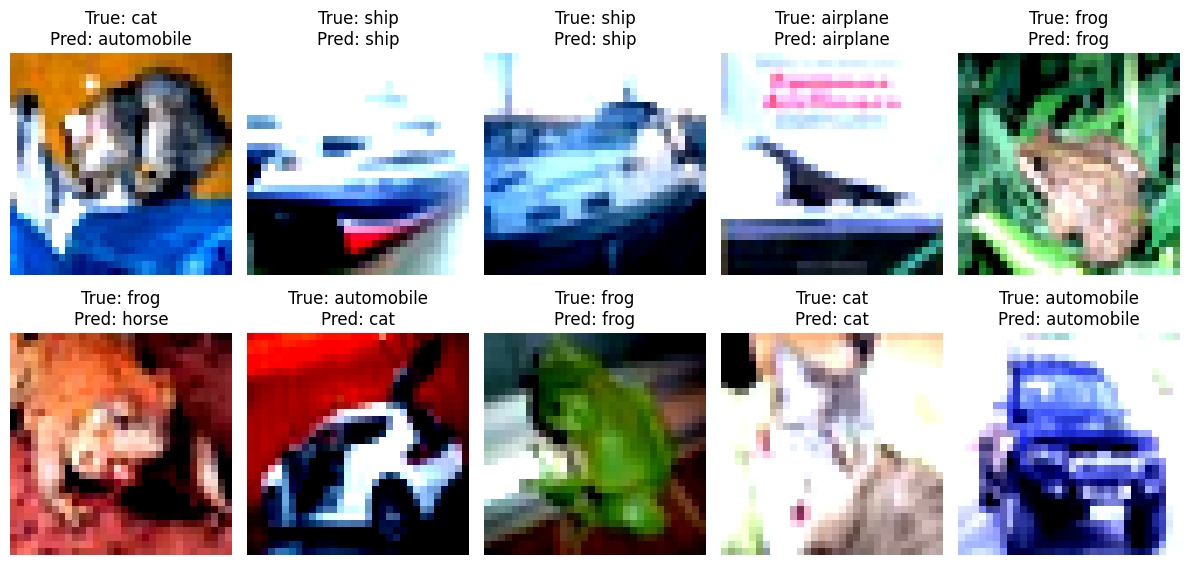

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 1. 資料預處理
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # CIFAR-10 原始大小已經是 32x32
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet 標準化
])

# 2. 加載 CIFAR-10 資料集
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. 加載 VGG19 模型
class VGG19Classifier(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG19Classifier, self).__init__()
        self.base_model = models.vgg19(pretrained=True)  # 加載預訓練模型
        for param in self.base_model.parameters():
            param.requires_grad = False  # 冻結預訓練權重

        # 替換分類器為適合 CIFAR-10 的結構
        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        return self.base_model(x)

# 初始化模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG19Classifier().to(device)

# 4. 訓練函數
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.4f}, "
              f"Accuracy: {100.*correct/total:.2f}%")

# 5. 測試函數
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    print(f"Test Accuracy: {100.*correct/total:.2f}%")
    return correct / total

# 定義損失函數與優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.base_model.classifier.parameters(), lr=0.001)

# 6. 訓練模型
train_model(model, train_loader, criterion, optimizer, num_epochs=10)

# 7. 測試模型
test_accuracy = test_model(model, test_loader)

# 8. 顯示圖片及真實標籤與預測標籤
def show_predictions(model, test_loader, num_images=10, class_names=None):
    model.eval()
    if class_names is None:
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck']

    inputs, targets = next(iter(test_loader))
    inputs, targets = inputs[:num_images], targets[:num_images]  # 取前 num_images 張圖片
    inputs, targets = inputs.to(device), targets.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = outputs.max(1)

    inputs = inputs.cpu().numpy()
    targets = targets.cpu().numpy()
    predicted = predicted.cpu().numpy()

    # 顯示圖片
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.transpose(inputs[i], (1, 2, 0)) * 0.5 + 0.5)  # 去標準化並顯示圖片
        plt.title(f"True: {class_names[targets[i]]}\nPred: {class_names[predicted[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, test_loader, num_images=10)


PyTorch Lightning

In [ ]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 55.5 MB/s eta 0:00:00


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | base_model | VGG              | 139 M  | train
1 | criterion  | CrossEntropyLoss | 0      | train
--------------------------------------------------------
41.0 K    Trainable params
139 M     Non-trainable params
139 M     Total params
558.445   Total estimated model params size (MB)
49        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


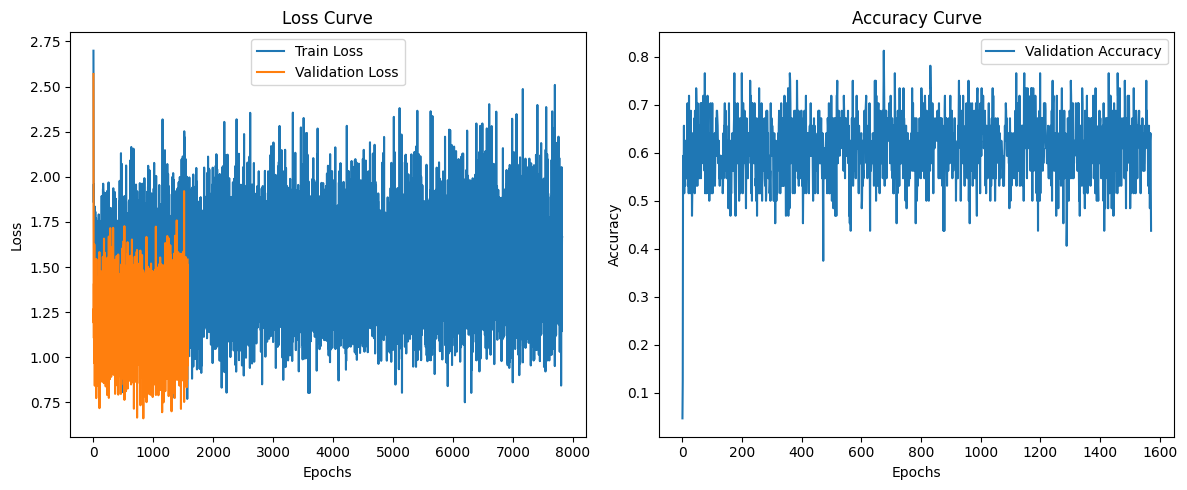

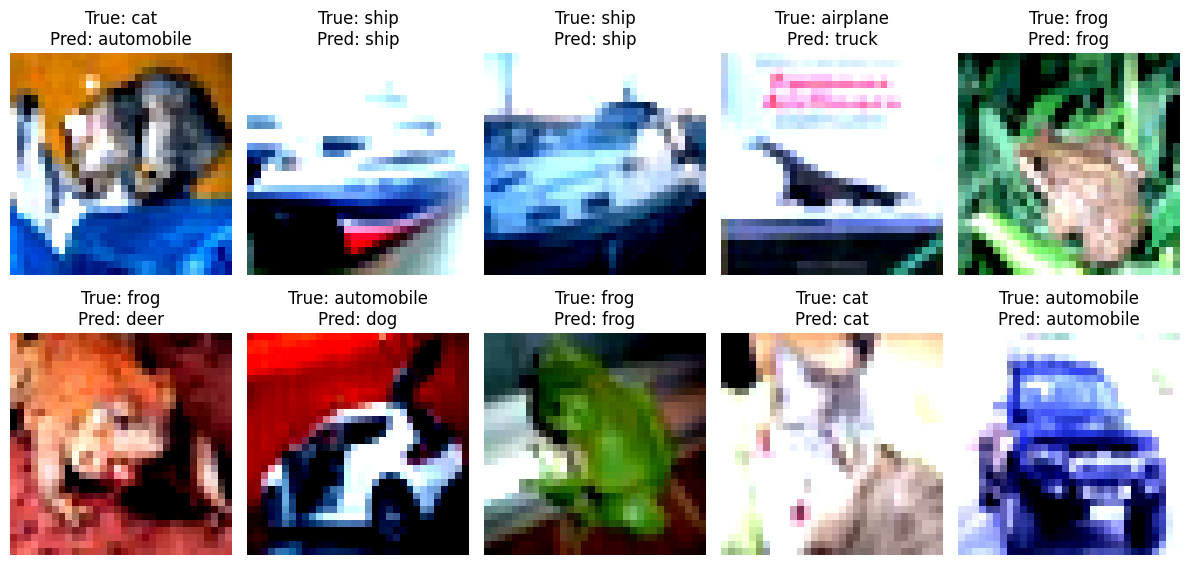

In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# 1. 資料預處理
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # CIFAR-10 原始大小為 32x32
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet 標準化
])

# 2. 加載 CIFAR-10 資料集
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. 定義 VGG19 模型
class VGG19Classifier(pl.LightningModule):
    def __init__(self, num_classes=10):
        super(VGG19Classifier, self).__init__()
        self.base_model = models.vgg19(pretrained=True)  # 加載預訓練模型
        for param in self.base_model.parameters():
            param.requires_grad = False  # 冻結預訓練權重

        # 替換分類器為適合 CIFAR-10 的結構
        self.base_model.classifier[6] = nn.Linear(4096, num_classes)

        self.criterion = nn.CrossEntropyLoss()

        # 儲存損失和準確度歷史數據
        self.train_loss_history = []
        self.val_loss_history = []
        self.val_acc_history = []

    def forward(self, x):
        return self.base_model(x)

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)
        self.log('train_loss', loss, prog_bar=True)
        self.train_loss_history.append(loss.item())  # 記錄訓練損失
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = self.criterion(outputs, targets)
        acc = (outputs.argmax(dim=1) == targets).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

        self.val_loss_history.append(loss.item())  # 記錄驗證損失
        self.val_acc_history.append(acc.item())  # 記錄驗證準確度

    def configure_optimizers(self):
        return torch.optim.Adam(self.base_model.classifier.parameters(), lr=0.001)

# 4. 初始化模型
model = VGG19Classifier()

# 5. 定義損失與準確度曲線繪製函數
def plot_metrics(model):
    plt.figure(figsize=(12, 5))

    # 損失曲線
    plt.subplot(1, 2, 1)
    plt.plot(model.train_loss_history, label='Train Loss')
    plt.plot(model.val_loss_history, label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 準確度曲線
    plt.subplot(1, 2, 2)
    plt.plot(model.val_acc_history, label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 6. 訓練模型
trainer = pl.Trainer(max_epochs=10, accelerator='auto', log_every_n_steps=1)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

# 7. 繪製損失與準確度曲線
plot_metrics(model)

# 8. 顯示圖片及真實標籤與預測標籤
def show_predictions(model, test_loader, num_images=10, class_names=None):
    model.eval()
    if class_names is None:
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck']

    inputs, targets = next(iter(test_loader))
    inputs, targets = inputs[:num_images], targets[:num_images]  # 取前 num_images 張圖片
    inputs = inputs.to(model.device)

    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = outputs.max(1)

    inputs = inputs.cpu().numpy()
    targets = targets.numpy()
    predicted = predicted.cpu().numpy()

    # 顯示圖片
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(np.transpose(inputs[i], (1, 2, 0)) * 0.5 + 0.5)  # 去標準化並顯示圖片
        plt.title(f"True: {class_names[targets[i]]}\nPred: {class_names[predicted[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 顯示測試集圖片與預測結果
show_predictions(model, test_loader, num_images=10)
